>>>>>> Oferta de crédito <<<<<
Produto____________
*Cartão de Credito

Premissas__________
*rápido
*consciente 

Riscos_____________
*clientes de classes emergentes (C|D|E)

Questão 1
O negócio da Fortbrasil consiste na oferta de crédito rápido e consciente para parceiros e clientes de classes emergentes, 
sendo nosso principal produto o cartão de crédito. Para a primeira questão, disponibilizamos algumas variáveis relacionadas à fatura dos clientes:

    ID_CONTA: Identificador da conta;
    DT_VENCIMENTO: Data vencimento da fatura;
    DS_ROLAGEM: Indicador que define se o cliente pagou a fatura do Mês anterior ou não. Se o valor for FX0 quer dizer que o 
                cliente pagou a fatura do mês anterior e se FX1 quer dizer que o cliente não pagou a fatura do mês anterior;
    VL_FATURA: Valor da Fatura atual.

Baseado nessas informações, responda:

1.1 – Qual o percentual de faturas emitidas por mês no qual os clientes não pagaram a fatura anterior? 

In [7]:
import pandas as pd
import numpy as np
import datetime

#Função para abrir o arquivo csv
def get_data(path = 'E:\Backup - Felipe\Documentos\FortBrasil\Case Cientista JR\Questão 1 - Base.txt'):
    df = pd.read_csv(path, sep="\t" )
    #Altera Tipo da Conluna
    df['DT_VENCIMENTO'] = pd.to_datetime(df['DT_VENCIMENTO'], errors='coerce')
    #Cria Coluna Ano_Mês
    df['ANO_MES'] = df['DT_VENCIMENTO'].dt.strftime('%Y-%m')
    #Cria Coluna Mês
    df['MES'] = df['DT_VENCIMENTO'].dt.strftime('%m')
    df['MES'] = pd.to_numeric(df['MES'])

    #Verificando valores Missing e removendo do dataset
    return df

df = get_data()
df.head()


,ID_CONTA,DT_VENCIMENTO,DS_ROLAGEM,VL_FATURA,ANO_MES,MES
0,402467,2019-01-01,FX0,210.00,2019-01,1
1,403001,2019-01-01,FX1,1097.18,2019-01,1
2,403499,2019-01-01,FX0,1209.88,2019-01,1
3,403670,2019-01-01,FX0,667.40,2019-01,1
4,404183,2019-01-01,FX1,1239.52,2019-01,1


In [8]:
df1 = get_data()
#Substituir Valores Coluna Criticidade
df1['DS_ROLAGEM'] = df1['DS_ROLAGEM']. replace (['FX0', 'FX1'], ['Pagou', 'N_Pagou'])

#Cria um agrupamento de dados 
df1 = df1.groupby(['DS_ROLAGEM','ANO_MES']).agg(
    Qtd_N_Pagou = ('DS_ROLAGEM','count')
    ).reset_index()
#pivotagem
df1 = df1.pivot(index='ANO_MES', columns='DS_ROLAGEM', values='Qtd_N_Pagou').reset_index()
#cria coluna Total
df1['Tot_Fatura'] = (df1['N_Pagou']+df1['Pagou'])
#cria coluna % Não Pago
df1['%_N_Pago'] = (df1['N_Pagou']/df1['Tot_Fatura'])*100
#Reordena as colunas
df1 = df1[['ANO_MES','Pagou','N_Pagou','Tot_Fatura','%_N_Pago']]
df1.head(9)

DS_ROLAGEM,ANO_MES,Pagou,N_Pagou,Tot_Fatura,%_N_Pago
0,2019-01,290548,22835,313383,7.286611
1,2019-02,285921,27928,313849,8.898547
2,2019-03,273886,33432,307318,10.878634
3,2019-04,276950,25380,302330,8.394800
4,2019-05,271544,30321,301865,10.044556
5,2019-06,278389,25977,304366,8.534790
6,2019-07,281005,29889,310894,9.613888
7,2019-08,288331,28736,317067,9.063069
8,2019-09,235222,21955,257177,8.536922


<AxesSubplot:xlabel='ANO_MES'>

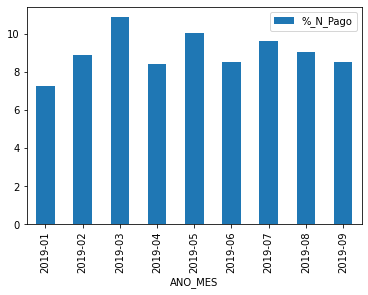

In [10]:
df1.plot(kind='bar', x='ANO_MES', y='%_N_Pago')

1.2 – Tendo como referência todos os clientes que tiveram fatura emitida no mês de setembro, gere uma base para esses clientes com os seguintes calculados:
    • Total de faturas emitidas nos últimos 6 meses (sem contar com a fatura de setembro);
    • O valor médio de fatura nos últimos 6 meses (sem contar com a fatura de setembro);
    • Quantidade de vezes que ele ficou sem pagar a fatura anterior nos últimos 6 meses (sem contar com a fatura de setembro). 

In [21]:
df2 = get_data()

#Substituir Valores Coluna Criticidade
df2['DS_ROLAGEM'] = df2['DS_ROLAGEM']. replace (['FX0', 'FX1'], ['Pagou', 'N_Pagou'])

#Filtra Mês 
df2  = df2.loc[((df['MES'] > 2) & (df['MES'] < 9))] 

#Cria um agrupamento de dados 'VL_FATURA'
df2 = df2.groupby(['ID_CONTA','DS_ROLAGEM']).agg(
    QTD_FATURA = ('DS_ROLAGEM','count')
    ).reset_index()
#pivotagem
df2 = df2.pivot(index='ID_CONTA', columns='DS_ROLAGEM', values='QTD_FATURA').reset_index()

#substituir os valores NaN
df2['N_Pagou'] = df2['N_Pagou'].fillna(0)
df2['Pagou'] = df2['Pagou'].fillna(0)

#cria coluna Total
df2['TOT_FATURA_6M'] = (df2['N_Pagou']+df1['Pagou'])
#df1_2.fillna(0)

df2.head()

DS_ROLAGEM,ID_CONTA,N_Pagou,Pagou,TOT_FATURA_6M
0,27717,0.0,6.0,290548.0
1,27789,0.0,6.0,285921.0
2,29643,1.0,0.0,273887.0
3,29766,0.0,1.0,276950.0
4,30256,0.0,6.0,271544.0


In [20]:
df = get_data()
#Filtra Mês 
df3 = df.loc[((df['MES'] > 2) & (df['MES'] < 9))] 

#Cria um agrupamento de dados 'VL_FATURA'
df3 = df3.groupby(['ID_CONTA']).agg(
    VL_MEDIO_FATURA_6M = ('VL_FATURA','mean')
    ).reset_index()

df3.head() 

,ID_CONTA,VL_MEDIO_FATURA_6M
0,27717,1623.128333
1,27789,913.355000
2,29643,115.940000
3,29766,47.630000
4,30256,441.881667


In [22]:
#Unir Dataframes
df4  = pd.merge(df2, df3, how='left', left_on=['ID_CONTA'], right_on=['ID_CONTA'])

path = 'Questão 1 - Base_1.2.csv'
#df3.to_csv(path, index=False, sep=';' ,encoding='Windows-1252', decimal=',') #sep=';' ,encoding='Windows-1252'
df4.head() 

,ID_CONTA,N_Pagou,Pagou,TOT_FATURA_6M,VL_MEDIO_FATURA_6M
0,27717,0.0,6.0,290548.0,1623.128333
1,27789,0.0,6.0,285921.0,913.355000
2,29643,1.0,0.0,273887.0,115.940000
3,29766,0.0,1.0,276950.0,47.630000
4,30256,0.0,6.0,271544.0,441.881667


In [26]:
df = get_data()
#Filtra Mês 
df5 = df.loc[(df['MES'] == 9)] 
#Unir Dataframes
df5  = pd.merge(df5, df4, how='left', left_on=['ID_CONTA'], right_on=['ID_CONTA'])
#Rename Columns
df5 = df5.rename(columns={'VL_FATURA': 'VL_FATURA_ATUAL' ,'N_Pagou': 'QTD_FATURAS_N_PG', 'Pagou': 'QTD_FATURAS_PAGA'})
df5 = df5[['ID_CONTA','DS_ROLAGEM','DT_VENCIMENTO','VL_FATURA_ATUAL','QTD_FATURAS_N_PG','QTD_FATURAS_PAGA','VL_MEDIO_FATURA_6M','TOT_FATURA_6M']]
df5.head() 

,ID_CONTA,DS_ROLAGEM,DT_VENCIMENTO,VL_FATURA_ATUAL,QTD_FATURAS_N_PG,QTD_FATURAS_PAGA,VL_MEDIO_FATURA_6M,TOT_FATURA_6M
0,99416,FX0,2019-09-01,2860.79,0.0,6.0,2791.616667,NaN
1,52706,FX0,2019-09-01,180.00,0.0,6.0,309.641667,NaN
2,1024221,FX0,2019-09-01,813.28,0.0,6.0,295.175000,NaN
3,1024238,FX0,2019-09-01,808.15,0.0,6.0,870.556667,NaN
4,1024293,FX0,2019-09-01,2068.17,0.0,6.0,1646.751667,NaN


In [27]:
path = 'Case Cientista JR/Questão 1(consolidad).csv'
df5.to_csv(path, index=False, sep=';' ,encoding='Windows-1252', decimal=',')

In [28]:
df5.describe()

,ID_CONTA,VL_FATURA_ATUAL,QTD_FATURAS_N_PG,QTD_FATURAS_PAGA,VL_MEDIO_FATURA_6M,TOT_FATURA_6M
count,2.571770e+05,257177.000000,240249.000000,240249.000000,240249.000000,5.000000
mean,1.322680e+06,548.157140,0.259310,4.715911,489.639231,274313.200000
std,3.842277e+05,557.653082,0.576663,1.656663,451.503937,23079.205222
min,2.771700e+04,30.000000,0.000000,0.000000,30.180000,235222.000000
25%,1.110950e+06,189.920000,0.000000,4.000000,199.240000,271544.000000
50%,1.446536e+06,386.830000,0.000000,6.000000,361.405000,285921.000000
75%,1.638762e+06,713.030000,0.000000,6.000000,624.413333,288331.000000
max,1.752194e+06,22647.480000,5.000000,7.000000,13904.000000,290548.000000


Segue exemplo:
 
1.3 – Utilizando como referência a base calculada na questão anterior, identifique qual das 3 variáveis calculadas tem o maior potencial de preditivo em relação a variável DS_ROLAGEM do mês de setembro. 
    R: 'QTD_FATURAS_N_PG'	
        • Quantidade de vezes que ele ficou sem pagar a fatura anterior nos últimos 6 meses (sem contar com a fatura de setembro). 
